In [18]:
import pandas as pd
import texthero as hero
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [2]:
# Read the XLSX file
data= pd.read_csv("../data/Emotion_final.csv")

In [3]:
data

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [4]:
# Étudier la répartition des textes par émotions
hero.scatterplot(data, 'Text', color='Emotion')

In [5]:
# Identifier les mots susceptibles d'être des stopwords
data['clean_text'] = hero.remove_stopwords(data['Text'])

In [11]:
data['clean_text'].head(11)

0                                 didnt feel humiliated
1       go  feeling  hopeless   damned hopeful    ar...
2          im grabbing  minute  post  feel greedy wrong
3       ever feeling nostalgic   fireplace   know   ...
4                                       feeling grouchy
5     ive  feeling  little burdened lately wasnt sur...
6     ive  taking  milligrams  times recommended amo...
7      feel  confused  life   teenager   jaded   yea...
8         petronas  years  feel  petronas  performed...
9                                        feel romantic 
10     feel like    make  suffering   seeing mean so...
Name: clean_text, dtype: object

In [12]:
# Étudier la répartition des textes par émotions
hero.scatterplot(data, 'clean_text', color='Emotion')

In [13]:
# Vectorisation des mots
tfidf = hero.TfidfVectorizer()
vectorized = tfidf.fit_transform(data['clean_text'])

In [16]:
# Réduction de dimension (TruncatedSVD)
svd = TruncatedSVD(n_components=2)
svd_components = svd.fit_transform(vectorized)

In [21]:
# Attribution de valeurs numériques uniques à chaque émotion
data['emotion_code'] = pd.factorize(data['Emotion'])[0]

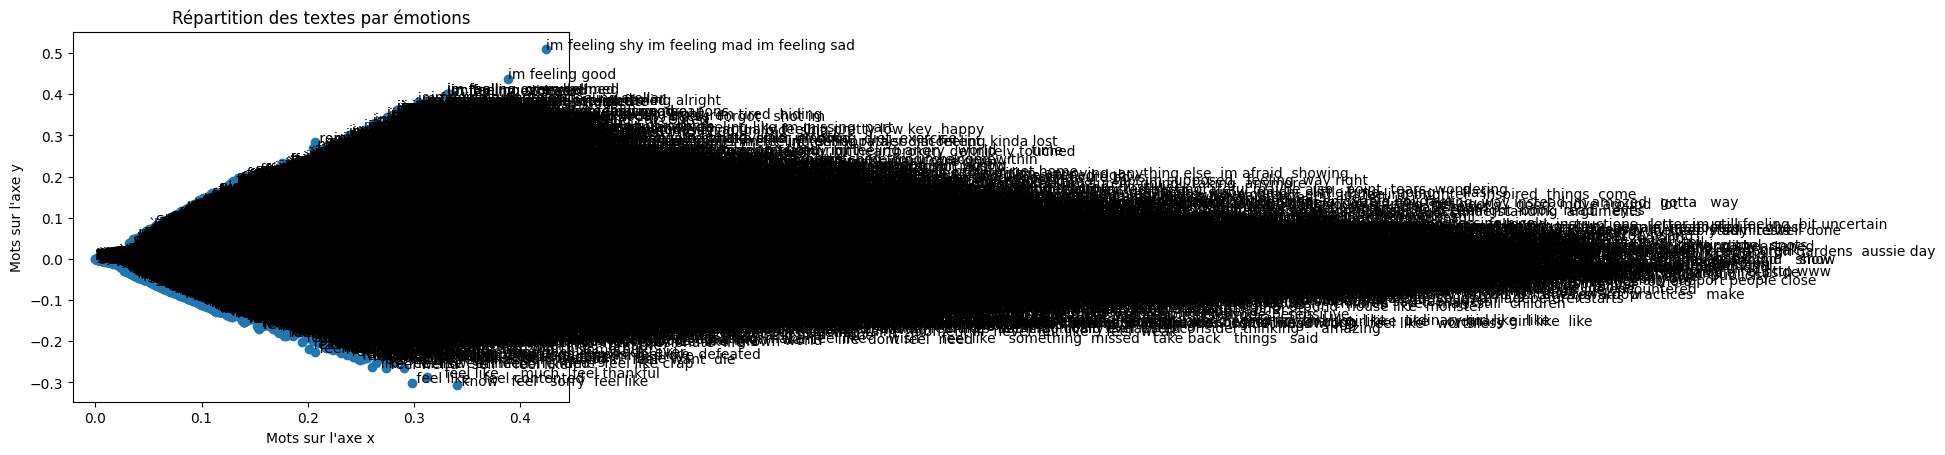

In [24]:
# Création du graphique avec les mots comme étiquettes
plt.scatter(svd_components[:, 0], svd_components[:, 1])
for i, text in enumerate(data['clean_text']):
    plt.annotate(text, (svd_components[i, 0], svd_components[i, 1]))
plt.xlabel('Mots sur l\'axe x')
plt.ylabel('Mots sur l\'axe y')
plt.title('Répartition des textes par émotions')
plt.show()